The most popular Python libraries out there are usually 
* TensorFlow, 
* Numpy, 
* PyTorch, 
* Pandas, 
* Scikit-Learn, 
* Keras and a few others. 

Although we may come across these names pretty frequently there are thousands of Python libraries out there that we can work with. In this article we are going to focus on how to use Python libraries that are rarely used or heard of, but that are incredibly useful to solve specific tasks or that we can use for a fun project.

The Python libraries we are going to practice on are:

* Missingno
* Tabulate
* Wikipedia
* Wget
* Faker
* Numerizer
* Emoji
* PyAztro

To begin we’ll download a dataset from Kaggle – [Animal Care and Control Adopted Animals](https://www.kaggle.com/jinbonnie/animal-data)

In [1]:
import pandas as pd

df = pd.read_csv('animal-data-1.csv')

In [2]:
print('Number of pets:', len(df))
df.head(3)

Number of pets: 10290


,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0


### 1. Missingno
Library installation: `pip install missingno`

In [4]:
# !pip install missingno

What is Missingno in Python? - Missingno is a special Python library used for displaying missing values in a dataframe. Of course, we can also use a seaborn heatmap or a bar plot from any visualization library for this purpose. However, in such cases, we’ll have to first create a series containing missing values in each column using `df.isnull().sum()`, while missingno already does all this under the hood. This Python library offers a few types of charts:

* **matrix** displays density patterns in data completion for up to 50 columns of a dataframe, and it is analogous to the seaborn missing value heatmap. Also, by means of the sparkline at right, it shows the general shape of the data completeness by row, emphasizing the rows with the maximum and minimum nullity.
* **bar chart** shows nullity visualization in bars by column.
* **heatmap** measures nullity correlation that ranges from `-1 to 1`. Essentially, it shows how strongly the presence or absence of one variable affects the presence of another. Columns with no missing values, or just the opposite, completely empty, are excluded from the visualization, having no meaningful correlation.
* **dendrogram**, like the heatmap, measures nullity relationships between columns, but in this case not pairwise but between groups of columns, detecting clusters of missing data. Those variables that are located closer on the chart show a stronger nullity correlation. For dataframes with less than 50 columns the dendrogram is vertical, otherwise, it flips to a horizontal.

Let’s try all these charts with their default settings on our pet dataset:

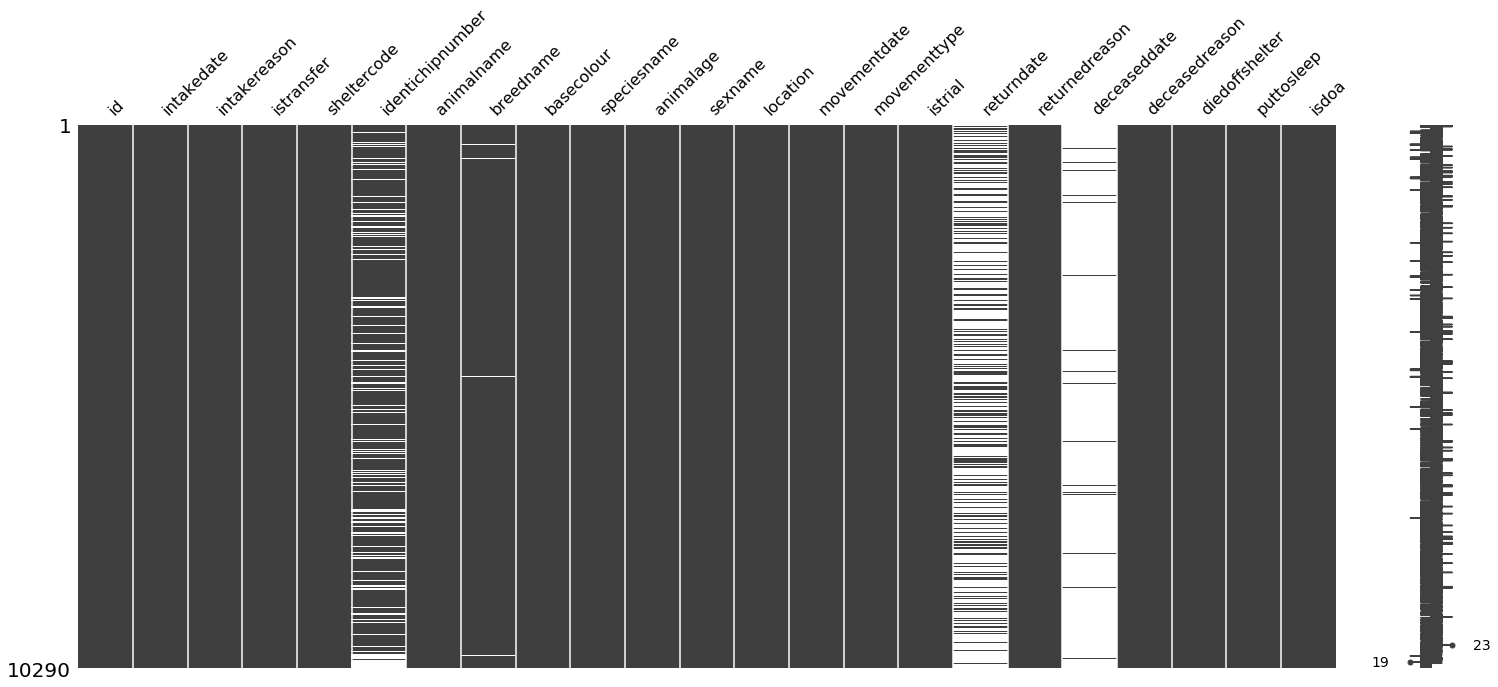

In [5]:
import missingno as msno

msno.matrix(df)

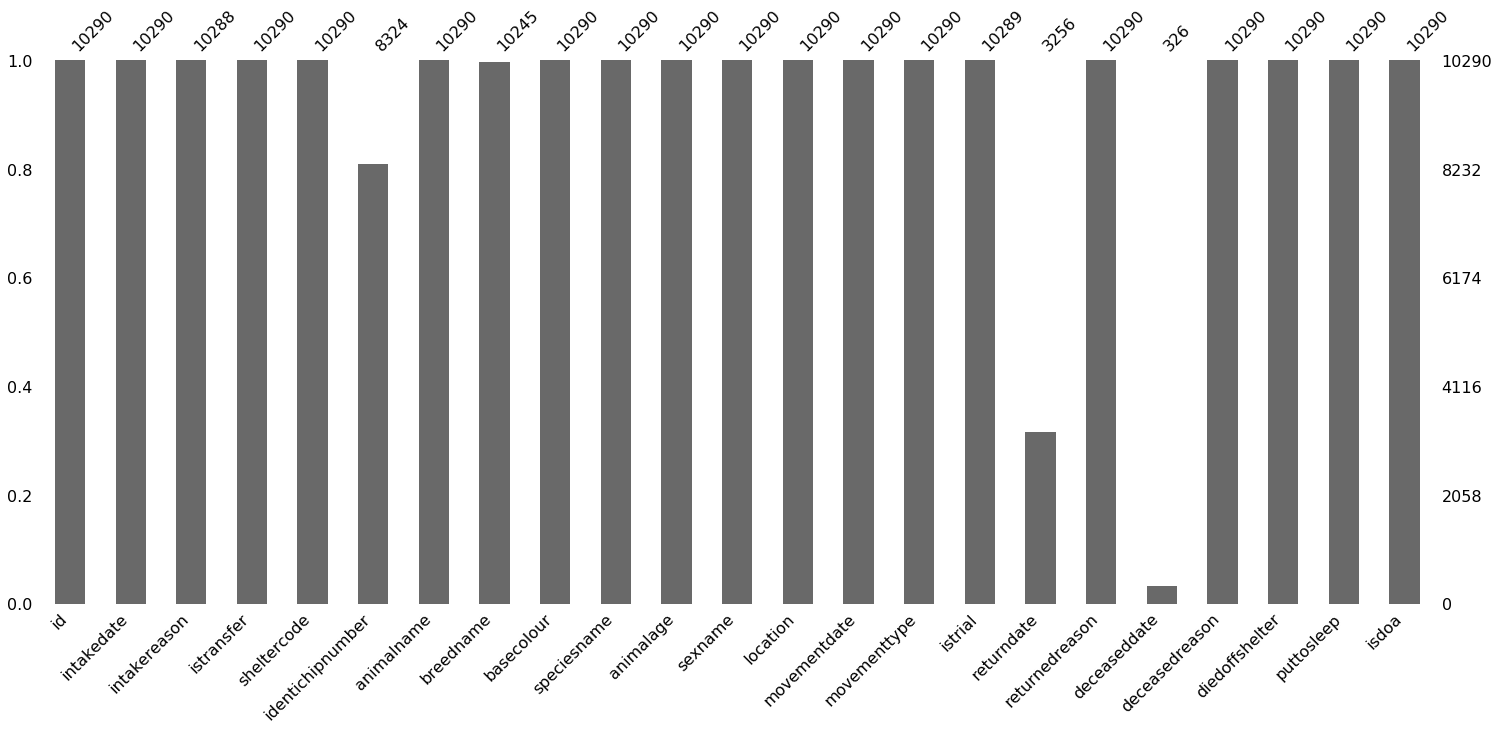

In [6]:
msno.bar(df)

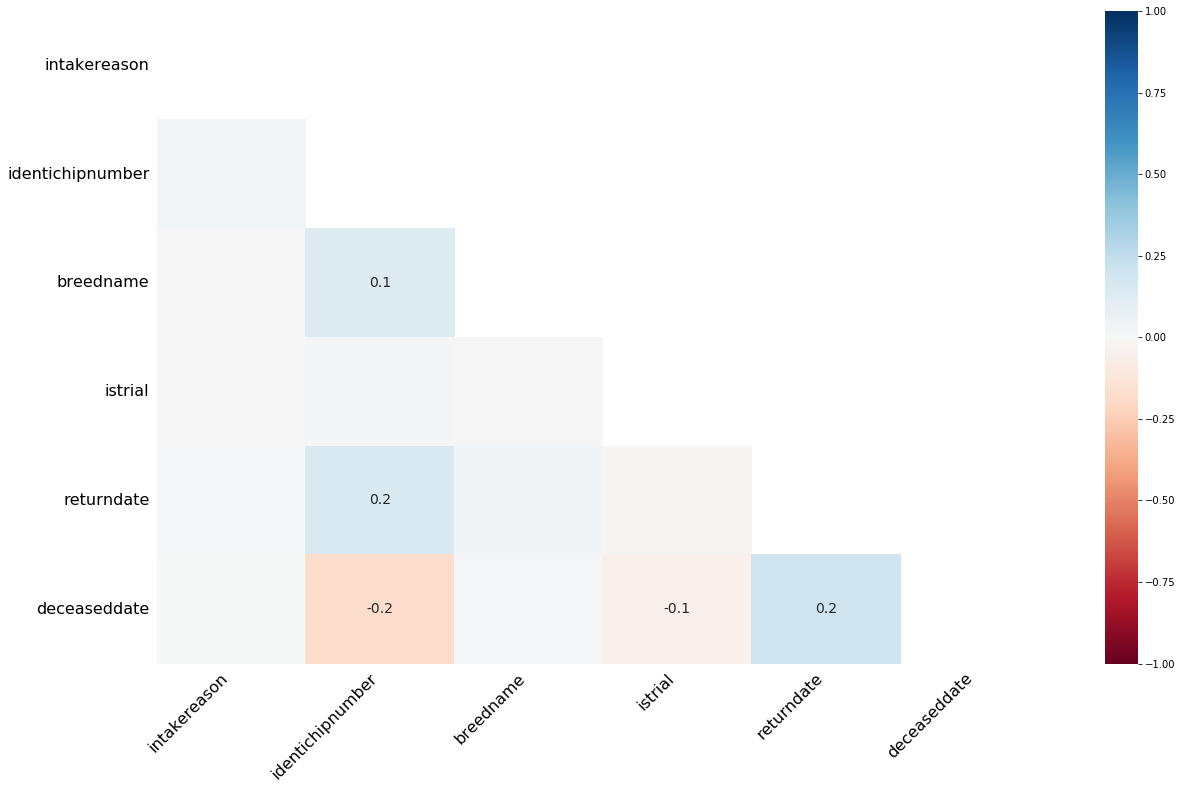

In [7]:
msno.heatmap(df)

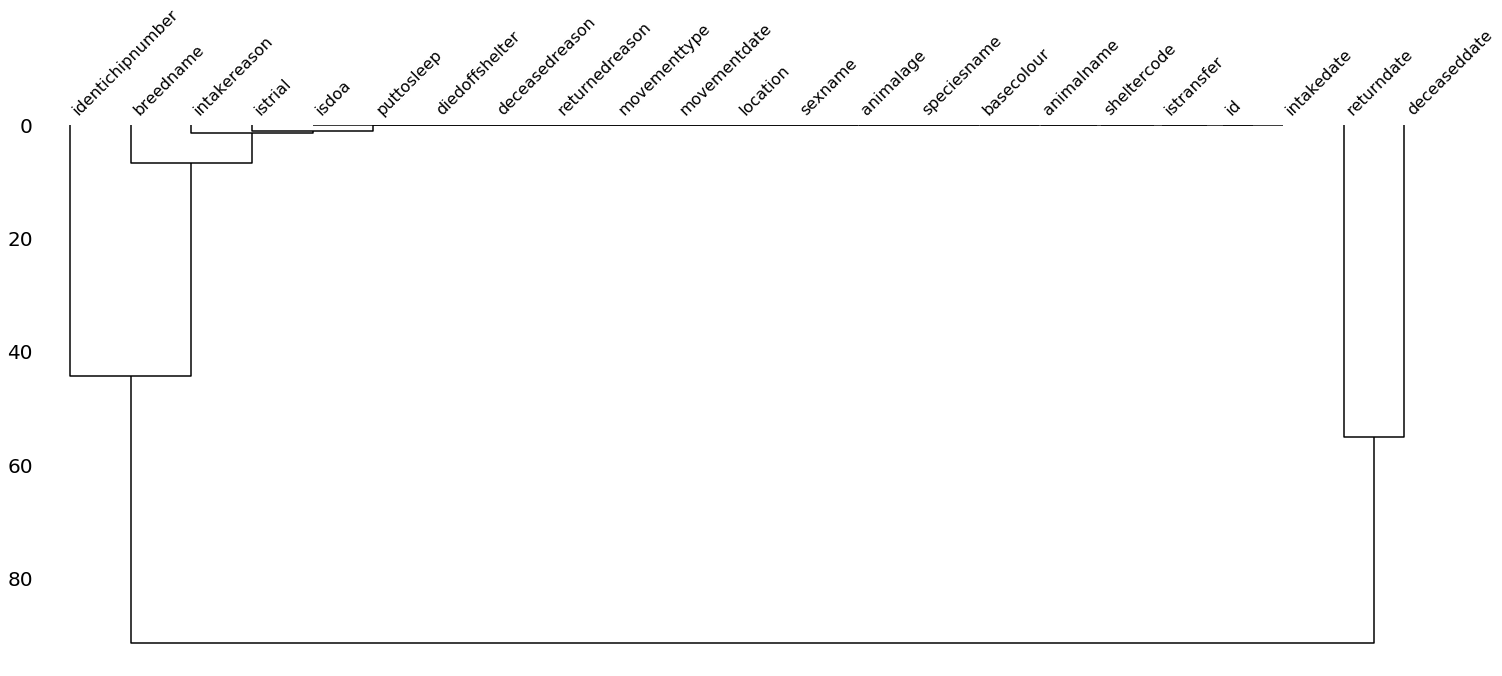

In [8]:
msno.dendrogram(df)

We can make the following observations about the dataset:

* In general, there are a few missing values.
* The most empty columns are `deceaseddate` and `returndate`.
* The majority of pets are chipped.
* Nullity correlation:
    * slightly negative between being chipped and being dead,
    * slightly positive – being chipped vs. being returned, being returned vs. being dead.

There are a few options to customize missingno charts: 
* **figsize**, 
* **fontsize**, 
* **sort** (sorts the rows by completeness, in either ascending or descending order), 
* **labels** (can be True or False, meaning whether to show or not the column labels). 

Some parameters are chart-specific: 
* **color** for matrix and bar charts, 
* -**sparkline** (whether to draw it or not) and **width_ratios** (matrix width to sparkline width) for matrix, 
* **log** (logarithmic scale) for bar charts, 
* **cmap** colormap for heatmap, 
* **orientation** for dendrogram. 

Let’s apply some of them to one of our charts above:

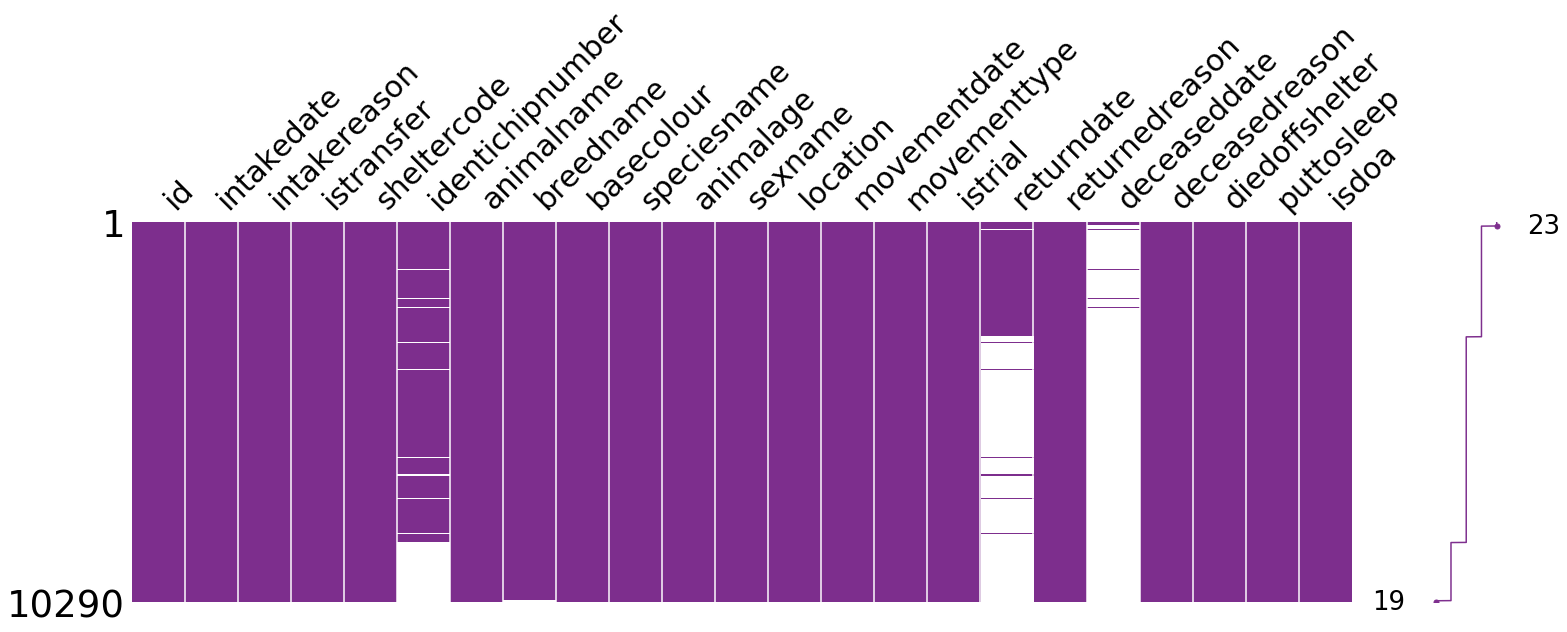

In [9]:
msno.matrix(
            df,
            figsize=(25,7),
            fontsize=30,
            sort='descending',
            color=(0.494, 0.184, 0.556),
            width_ratios=(10, 1)
            )

Finally, if there is still something we would like to tune, we can always add any functionality of matplotlib to the missingno graphs. To do this, we should add the parameter inline and assign it to **False**. Let’s add a title to our matrix chart:

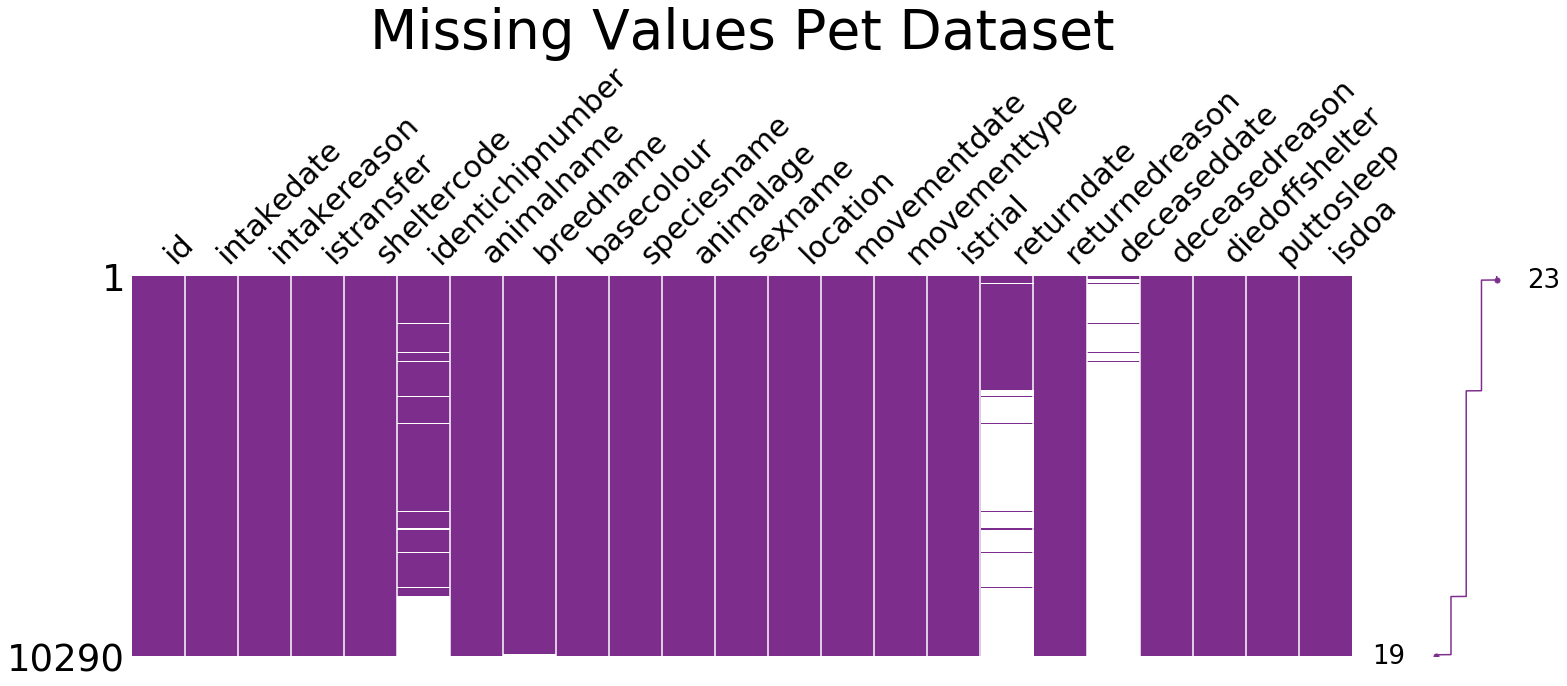

In [10]:
import matplotlib.pyplot as plt
msno.matrix(
            df,
            figsize=(25,7),
            fontsize=30,
            sort='descending',
            color=(0.494, 0.184, 0.556),
            width_ratios=(10, 1),
            inline=False
            )
plt.title('Missing Values Pet Dataset', fontsize=55)
plt.show()

For further practice, let’s keep only the most interesting columns of our dataframe:

In [11]:
columns = ['identichipnumber', 'animalname', 'breedname', 'speciesname', 'sexname', 'returndate',
           'returnedreason']
df = df[columns]

[Missingno Documentation](https://github.com/ResidentMario/missingno)

### 2. Tabulate

Library installation: `pip install tabulate`

In [14]:
# !pip install tabulate

What is Tabulate in Python? - This Python library serves for pretty-printing tabular data in Python. It allows smart and customizable column alignment, number and text formatting, alignment by a decimal point.

The `tabulate()` function takes a tabular data type (dataframe, list of lists or dictionaries, dictionary, NumPy array), some other optional parameters, and outputs a nicely formatted table. 

Let’s practice it on a fragment of our pet dataset, starting with the most basic pretty-printed table:

In [16]:
from tabulate import tabulate
df_pretty_printed = df.iloc[:5, [1,2,4,6]]
print(tabulate(df_pretty_printed))

-  -----------  -----------------------  ------  -----
0  Jadzia       Domestic Short Hair      Female  Stray
1  Gonzo        German Shepherd Dog/Mix  Male    Stray
2  Maggie       Shep Mix/Siberian Husky  Female  Stray
3  Pretty Girl  Domestic Short Hair      Female  Stray
4  Pretty Girl  Domestic Short Hair      Female  Stray
-  -----------  -----------------------  ------  -----


We can add a headers parameter to our table. If we assign `headers='firstrow'`, the first row of data is used, if `headers='keys'` – the keys of a dataframe / dictionary. For table formatting, we can use a tablefmt parameter, which can take one of the numerous options (assigned as a string): 
* simple, 
* github, 
* grid, 
* fancy_grid, 
* pipe, 
* orgtbl, 
* jira, 
* presto, 
* pretty, etc.

By default, tabulate aligns columns containing float numbers by a decimal point, integers – to the right, text columns – to the left. This can be overridden by using numalign and stralign parameters (right, center, left, decimal for numbers, or None). For text columns, it’s possible to disable the default leading and trailing whitespace removal.

Let’s customize our table:

In [17]:
print(tabulate(
               df_pretty_printed,
               headers='keys',
               tablefmt='fancy_grid',
               stralign='center'
               ))

╒════╤══════════════╤═════════════════════════╤═══════════╤══════════════════╕
│    │  animalname  │        breedname        │  sexname  │  returnedreason  │
╞════╪══════════════╪═════════════════════════╪═══════════╪══════════════════╡
│  0 │    Jadzia    │   Domestic Short Hair   │  Female   │      Stray       │
├────┼──────────────┼─────────────────────────┼───────────┼──────────────────┤
│  1 │    Gonzo     │ German Shepherd Dog/Mix │   Male    │      Stray       │
├────┼──────────────┼─────────────────────────┼───────────┼──────────────────┤
│  2 │    Maggie    │ Shep Mix/Siberian Husky │  Female   │      Stray       │
├────┼──────────────┼─────────────────────────┼───────────┼──────────────────┤
│  3 │ Pretty Girl  │   Domestic Short Hair   │  Female   │      Stray       │
├────┼──────────────┼─────────────────────────┼───────────┼──────────────────┤
│  4 │ Pretty Girl  │   Domestic Short Hair   │  Female   │      Stray       │
╘════╧══════════════╧═════════════════════════╧═════

One thing to keep in mind when using this Python library is that it can sometimes have issues getting displayed on smaller screens such as smartphones and iPhones, these pretty-printed tables are best displayed on laptops and computers.

[Tabulate Documentation](https://pypi.org/project/tabulate/)

### 3. Wikipedia
Library installation: `pip install wikipedia`

In [19]:
# !pip install wikipedia

What is the Wikipedia library in Python? - Wikipedia library, as its name suggests, facilitates accessing and fetching information from Wikipedia. Some of the tasks that can be accomplished with it include:

* searching Wikipedia – search(),
* getting article summaries – summary,
* getting full page contents, including images, links, any other metadata of a Wikipedia page – page(),
* selecting the language of a page – set_lang().

In the pretty-printed table above, we saw a dog breed called `“Siberian Husky”`. As an exercise, we’ll set the language to Russian (my native language :`slightly_smiling_face`:) and search for some suggestions of the corresponding Wikipedia pages:

In [20]:
import wikipedia
wikipedia.set_lang('ru')
print(wikipedia.search('Siberian Husky'))

['Древние породы собак', 'Породы собак по классификации кинологических организаций', 'Маккензи Ривер Хаски', 'Ричардсон, Кевин Майкл']


Let’s take the first suggestion and fetch the first sentence of that page’s summary:

In [21]:
print(wikipedia.summary('Сибирский хаски', sentences=1))

Сибирский хаски — заводская специализированная порода собак, выведенная чукчами северо-восточной части Сибири и зарегистрированная американскими кинологами в 1930-х годах как ездовая собака, полученная от аборигенных собак Дальнего Востока России, в основном из Анадыря, Колымы, Камчатки у местных оседлых приморских племён — юкагиров, кереков, азиатских эскимосов и приморских чукчей — анкальын (приморские, поморы — от анкы (море)).


Now, we’re going to get a link to a picture of Husky from this page:

In [22]:
print(wikipedia.page('Сибирский хаски').images[0])

https://upload.wikimedia.org/wikipedia/commons/a/a3/Black-Magic-Big-Boy.jpg


[Wikipedia Documentation](https://wikipedia.readthedocs.io/en/latest/code.html#api)

### 4. Wget

Library installation: `pip install wget`

In [24]:
# !pip install wget

`Wget` library allows downloading files in Python without the necessity to open them. We can also add a path where to save this file as a second argument.

Let’s download the picture of Husky above:

In [25]:
import wget
wget.download('https://upload.wikimedia.org/wikipedia/commons/a/a3/Black-Magic-Big-Boy.jpg')

100% [............................................................................] 238674 / 238674

'Black-Magic-Big-Boy.jpg'

Now we can find the picture in the same folder as this notebook, since we didn’t specify a path where to save it.

Since any webpage on the Internet is actually an HTML file, another very useful application of this library is to crawl the whole webpage, with all its elements. Let’s download the Kaggle webpage where our dataset is located:

In [26]:
wget.download('https://www.kaggle.com/jinbonnie/animal-data')

-1 / unknown

'animal-data'

The resulting animal-data file looks like the following (we’ll display only several first rows):

[Wget Documentation](https://pypi.org/project/wget/)

### 5. Faker
Library installation: `pip install Faker`

In [30]:
# !pip install Faker

What is Faker library in Python? - This module is used to generate fake data, including names, addresses, emails, phone numbers, jobs, texts, sentences, colors, currencies, etc. The faker generator can take a locale as an argument (the default is en_US locale), to return localized data. For generating a piece of text or a sentence, we can use the default lorem ipsum; alternatively, we can provide our own set of words. To ensure that all the created values are unique for some specific instance (for example, when we want to create a long list of fake names), the .unique property is applied. If instead, it’s necessary to produce the same value or data set, the seed() method is used.

Let’s look at some examples.

In [31]:
from faker import Faker
fake = Faker()

print(
      'Fake color:', fake.color(), '\n'
      'Fake job:',   fake.job(),   '\n'
      'Fake email:', fake.email(), '\n'
      )

Fake color: #e074b7 
Fake job: Engineer, technical sales 
Fake email: adamparker@faulkner.com 



In [32]:
# Printing a list of fake Korean and Portuguese addresses
fake = Faker(['ko_KR', 'pt_BR'])
for _ in range(5):
    print(fake.unique.address())     # using the `.unique` property

print('\n')

서울특별시 금천구 논현길
강원도 청주시 청원구 논현46길
Rua Vitória Fernandes, 65
Alto Das Antenas
14457585 Moura / SE
대구광역시 광진구 석촌호수로 (하은홍손리)
세종특별자치시 동구 잠실로 (정순유강면)




In [33]:
# Assigning a seed number to print always the same value / data set
fake = Faker()
Faker.seed(3920)
print('This English fake name is always the same:', fake.name())

This English fake name is always the same: Kim Lopez


Returning to our dataset, we found out that there are at least two unlucky pets with not really nice names:

In [34]:
df_bad_names = df[df['animalname'].str.contains('Stink|Pooh')]
df_bad_names

,identichipnumber,animalname,breedname,speciesname,sexname,returndate,returnedreason
1692,NaN,Stinker,Domestic Short Hair,Cat,Male,NaN,Stray
3336,981020023417175,Pooh,German Shepherd Dog,Dog,Female,2018-05-14 00:00:00,Incompatible with owner lifestyle
3337,981020023417175,Pooh,German Shepherd Dog,Dog,Female,NaN,Stray


The dog from the last 2 rows is actually the same one, returned to the shelter because of being incompatible with the owner’s lifestyle. With our new skills, let’s save the reputation of both animals and rename them into something more decent. Since the dog is a German Shepherd, we’ll select a German name for her. As for the cat, according to this [Wikipedia page](https://en.wikipedia.org/wiki/Domestic_short-haired_cat), Domestic Short Hair is the most common breed in the US, so for him, we’ll select an English name.

In [35]:
# Defining a function to rename the unlucky pets
def rename_pets(name):
    if name == 'Stinker':
        fake = Faker()
        Faker.seed(162)
        name = fake.name()
    if name == 'Pooh':
        fake = Faker(['de_DE'])
        Faker.seed(20387)
        name = fake.name()
    return name

# Renaming the pets
df['animalname'] = df['animalname'].apply(rename_pets)

In [36]:
# Checking the results
df.iloc[df_bad_names.index.tolist(), :] 

,identichipnumber,animalname,breedname,speciesname,sexname,returndate,returnedreason
1692,NaN,Steven Harris,Domestic Short Hair,Cat,Male,NaN,Stray
3336,981020023417175,Helena Fliegner-Karz,German Shepherd Dog,Dog,Female,2018-05-14 00:00:00,Incompatible with owner lifestyle
3337,981020023417175,Helena Fliegner-Karz,German Shepherd Dog,Dog,Female,NaN,Stray


Steven Harris and Helena Fliegner-Karz sound a little bit too bombastic for a cat and a dog, but definitely much better than their previous names!

[Faker Documentation](https://faker.readthedocs.io/en/master/)

### 6. Numerizer

Library installation: `pip install numerizer`

In [38]:
# !pip install numerizer

What is the Numerizer library in Python? - This small Python package is used for converting natural language numerics into numbers (integers and floats) and consists of only one function – numerize().

Let’s try it right now on our dataset. Some pets’ names contain numbers:

In [39]:
df_numerized_names = df[['identichipnumber', 'animalname', 'speciesname']]\
                        [df['animalname'].str.contains('Two|Seven|Fifty')]
df_numerized_names


,identichipnumber,animalname,speciesname
2127,NaN,Seven,Dog
4040,981020025503945,Fifty Lee,Cat
6519,981020021481875,Two Toes,Cat
6520,981020021481875,Two Toes,Cat
7757,981020029737857,Mew Two,Cat
7758,981020029737857,Mew Two,Cat
7759,981020029737857,Mew Two,Cat


We’re going to convert the numeric part of these names into real numbers:

In [40]:
from numerizer import numerize
df['animalname'] = df['animalname'].apply(lambda x: numerize(x))
df[['identichipnumber', 'animalname', 'speciesname']].iloc[df_numerized_names.index.tolist(), :]

,identichipnumber,animalname,speciesname
2127,NaN,7,Dog
4040,981020025503945,50 Lee,Cat
6519,981020021481875,2 Toes,Cat
6520,981020021481875,2 Toes,Cat
7757,981020029737857,Mew 2,Cat
7758,981020029737857,Mew 2,Cat
7759,981020029737857,Mew 2,Cat


[Numerizer Documentation](https://pypi.org/project/numerizer/)

### 7. Emoji
Library installation: `pip install emoji`

In [41]:
!pip install emoji

What is the Emoji library in Python? - By using this library, we can convert strings to emoji, according to the Emoji codes as defined by the [Unicode Consortium 2](http://www.unicode.org/emoji/charts/full-emoji-list.html), and, if specified use_aliases=True, complemented with the [aliases](https://www.webfx.com/tools/emoji-cheat-sheet/). The emoji package has only two functions: emojize() and demojize(). The default English language (language='en') can be changed to Spanish (es), Portuguese (pt), or Italian (it).

In [42]:
import emoji
print(emoji.emojize(':koala:'))
print(emoji.demojize(''))
print(emoji.emojize(':rana:', language='it'))

🐨

🐸


Let’s emojize our animals. First, we’ll check their unique species names:

In [43]:
df['speciesname'].unique()

array(['Cat', 'Dog', 'House Rabbit', 'Rat', 'Bird', 'Opossum', 'Chicken',
       'Wildlife', 'Ferret', 'Tortoise', 'Pig', 'Hamster', 'Guinea Pig',
       'Gerbil', 'Lizard', 'Hedgehog', 'Chinchilla', 'Goat', 'Snake',
       'Squirrel', 'Sugar Glider', 'Turtle', 'Tarantula', 'Mouse',
       'Raccoon', 'Livestock', 'Fish'], dtype=object)

We have to convert these names into lower case, add leading and trailing colons to each, and then apply `emojize()` to the result:

In [44]:
df['speciesname'] = df['speciesname'].apply(lambda x: emoji.emojize(f':{x.lower()}:',
                                                                    use_aliases=True))
df['speciesname'].unique()

array(['🐱', '🐶', ':house rabbit:', '🐀', '🐦', ':opossum:', '🐔',
       ':wildlife:', ':ferret:', ':tortoise:', '🐷', '🐹', ':guinea pig:',
       ':gerbil:', '🦎', '🦔', ':chinchilla:', '🐐', '🐍', ':squirrel:',
       ':sugar glider:', '🐢', ':tarantula:', '🐭', '🦝', ':livestock:', '🐟'],
      dtype=object)

Let’s rename the house rabbit, tortoise, and squirrel into their synonyms comprehensible for the emoji library and try emojizing them again:

In [45]:
df['speciesname'] = df['speciesname'].str.replace(':house rabbit:', ':rabbit:')\
                                         .replace(':tortoise:', ':turtle:')\
                                         .replace(':squirrel:', ':chipmunk:')
df['speciesname'] = df['speciesname'].apply(lambda x: emoji.emojize(x, variant='emoji_type'))

df['speciesname'].unique()

array(['🐱', '🐶', '🐇️', '🐀', '🐦', ':opossum:️', '🐔', ':wildlife:️',
       ':ferret:️', '🐢️', '🐷', '🐹', ':guinea pig:', ':gerbil:️', '🦎', '🦔',
       ':chinchilla:️', '🐐', '🐍', '🐿️', ':sugar glider:', '🐢',
       ':tarantula:️', '🐭', '🦝', ':livestock:️', '🐟'], dtype=object)

The remaining species are of collective names (wildlife and livestock), or don’t have an emoji equivalent, at least not yet. We’ll leave them as they are, removing only the colons and converting them back into title case:

In [46]:
df['speciesname'] = df['speciesname'].str.replace(':', '').apply(lambda x: x.title())

In [47]:
df['speciesname'].unique()

array(['🐱', '🐶', '🐇️', '🐀', '🐦', 'Opossum️', '🐔', 'Wildlife️', 'Ferret️',
       '🐢️', '🐷', '🐹', 'Guinea Pig', 'Gerbil️', '🦎', '🦔', 'Chinchilla️',
       '🐐', '🐍', '🐿️', 'Sugar Glider', '🐢', 'Tarantula️', '🐭', '🦝',
       'Livestock️', '🐟'], dtype=object)

In [48]:
df[['animalname', 'speciesname', 'breedname']].head(3)

,animalname,speciesname,breedname
0,Jadzia,🐱,Domestic Short Hair
1,Gonzo,🐶,German Shepherd Dog/Mix
2,Maggie,🐶,Shep Mix/Siberian Husky


[Emoji Documentation](https://www.dataquest.io/blog/8-rarely-used-python-libraries-how-to-use-them/?utm_source=Iterable&utm_medium=email&utm_campaign=newsletter_157)

### 8. PyAztro

Library installation: `pip install pyaztro`

In [50]:
# !pip install pyaztro

What is the PyAstro library in Python? - PyAztro seems to be designed more for fun than for work. This library provides a horoscope for each zodiac sign. The prediction includes the description of a sign for that day, date range of that sign, mood, lucky number, lucky time, lucky color, compatibility with other signs. For example:

In [51]:
import pyaztro
pyaztro.Aztro(sign='taurus').description

"Anything can change today, which is appropriate for the first day of a new year. It's a good time to decide what you want to do over the next year and then figure out how to get there."

Great! I’m already running to buy a new house :grinning:

In our dataset, there are a cat and a dog called Aries:

In [52]:
df[['animalname', 'speciesname']][(df['animalname'] == 'Aries')]

,animalname,speciesname
3036,Aries,🐱
9255,Aries,🐶


and plenty of pets called Leo:

In [53]:
'Leo:', df['animalname'][(df['animalname'] == 'Leo')].count()

('Leo:', 18)

Let’s assume that those are their corresponding zodiac signs 😉 With PyAztro, we can check what the stars have prepared for these animals for today:

In [54]:
aries = pyaztro.Aztro(sign='aries')
leo = pyaztro.Aztro(sign='leo')

print('ARIES: \n',
      'Sign:',             aries.sign,          '\n',
      'Current date:',     aries.current_date,  '\n',
      'Date range:',       aries.date_range,    '\n',
      'Sign description:', aries.description,   '\n',
      'Mood:',             aries.mood,          '\n',
      'Compatibility:',    aries.compatibility, '\n',
      'Lucky number:',     aries.lucky_number,  '\n',
      'Lucky time:',       aries.lucky_time,    '\n',
      'Lucky color:',      aries.color,       2*'\n',

      'LEO: \n',
      'Sign:',             leo.sign,            '\n',
      'Current date:',     leo.current_date,    '\n',
      'Date range:',       leo.date_range,      '\n',
      'Sign description:', leo.description,     '\n',
      'Mood:',             leo.mood,            '\n',
      'Compatibility:',    leo.compatibility,   '\n',
      'Lucky number:',     leo.lucky_number,    '\n',
      'Lucky time:',       leo.lucky_time,      '\n',
      'Lucky color:',      leo.color)

ARIES: 
 Sign: aries 
 Current date: 2021-10-21 
 Date range: [datetime.datetime(2021, 3, 21, 0, 0), datetime.datetime(2021, 4, 20, 0, 0)] 
 Sign description: Having conviction in your ideas gives you a strength that no one else can match. 
 Mood: Artistic 
 Compatibility: Sagittarius 
 Lucky number: 29 
 Lucky time: 8pm 
 Lucky color: Rose Pink 

 LEO: 
 Sign: leo 
 Current date: 2021-10-21 
 Date range: [datetime.datetime(2021, 7, 23, 0, 0), datetime.datetime(2021, 8, 22, 0, 0)] 
 Sign description: Smile today! When you greet the world with a bright smile, you inspire confidence. 
 Mood: Cheerful 
 Compatibility: Virgo 
 Lucky number: 94 
 Lucky time: 3am 
 Lucky color: Pink


These forecasts are valid for **Today**, so if we want to check our pets’ horoscope (or maybe our own one) for the current day, we have to re-run the code above. All the properties, apart from, evidently, sign and `date_range`, change every day for each zodiac sign at midnight GTM.

[PyAztro Documentation](https://github.com/sameerkumar18/pyaztro)

Certainly, there are many other funny Python libraries like PyAztro, including:

* [Art 2](https://pypi.org/project/art/) – for converting text to ASCII art, like this: ʕ •`ᴥ•´ʔ
* [Turtle](https://docs.python.org/3/library/turtle.html) – for drawing,
* [Chess 2](https://pypi.org/project/chess/) – for playing chess,
* [Santa](https://pypi.org/project/santa/) – for randomly pairing Secret Santa gifters and recipients,
and even

* [Pynder 5](https://pypi.org/project/pynder/) – for using Tinder.

We can be sure that by using these rare Python libraries we’ll never get bored!

### Conclusion

To sum up, we wish all the pets from the dataset to find their loving and caring owners, and the Python users – to discover more amazing libraries and apply them to their projects.